In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import cv2
import os
import time
from keras.applications import vgg16
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential,load_model
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import InputLayer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
train_folder = '/content/drive/My Drive/dataset/voilajones_ck+/'
expres_code = ['ang','dis','fea','hap','sad','sur']
#expressions = [ 0,   1,   2,   3,   4,   5]
def read_data(dir_path):
    img_names = []
    img_data_list = []
    labels = []
    img_list = os.listdir(dir_path)
    for img in img_list:
        input_img = cv2.imread(dir_path + img)
        input_img=cv2.resize(input_img,(224,224))
        img_data_list.append(input_img)
        label = img[4:7]  # each name of image have 2 char for label from index 3-5
        labels.append(expres_code.index(label))
        img_names.append(img)
    img_data = np.array(img_data_list)
    print(img_data)
    return img_data, labels, img_names

X, Y, img_names = read_data(train_folder)

[[[[ 17  17  17]
   [ 17  17  17]
   [ 21  21  21]
   ...
   [ 64  64  64]
   [ 63  63  63]
   [ 63  63  63]]

  [[ 17  17  17]
   [ 17  17  17]
   [ 21  21  21]
   ...
   [ 63  63  63]
   [ 63  63  63]
   [ 63  63  63]]

  [[ 18  18  18]
   [ 18  18  18]
   [ 21  21  21]
   ...
   [ 64  64  64]
   [ 64  64  64]
   [ 64  64  64]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[ 12  12  12]
   [ 12  12  12]
   [ 13  13  13]
   ...
   [ 29  29  29]
   [ 25  25  25]
   [ 25  25  25]]

  [[ 12  12  12]
   [ 12  12  12]
   [ 13  13  13]
   ...
   [ 29  29  29]
   [ 25  25  25]
   [ 25  25  25]]

  [[ 12  12  12]
   [ 12  12  12]
   [ 14  14  14]
   ...
   [ 36  36  36]
   [ 32  32  32]
   [ 32  32

In [9]:
img_x=np.array(X)
img_x = img_x.astype('float32')
img_x = img_x/255
img_x.shape

(927, 224, 224, 3)

In [10]:
labels=np.array(Y)
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4,
       4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4,
       4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0,
       0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 4, 4,

In [11]:
input_shape=(224,224,3)
vgg = vgg16.VGG16(include_top=True, weights='imagenet')

out = Dense(6, activation='softmax', name='predictions')(vgg.layers[-2].output)
vgg_model = Model(vgg.input, out)

for layer in vgg_model.layers:
    if layer.name in ['predictions','fc1','fc2']:
        layer.trainable = True
    else:
        layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f7053bc2438>,input_3,False
1,<keras.layers.convolutional.Conv2D object at 0x7f7053bc2518>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f7053bc2780>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f7053bc2cc0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f7053bc2b00>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f7053bc4588>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f7053bcb3c8>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f7053bcb208>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f7053bcbef0>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f7053bd4a90>,block3_conv3,False


In [12]:
vgg_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [13]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(img_x, labels)

10

In [14]:
import matplotlib.pyplot as plt
def cnn_model(x_train,x_test,y_test,y_train):
    vgg = vgg16.VGG16(include_top=True, weights='imagenet')

    out = Dense(6, activation='softmax', name='predictions')(vgg.layers[-2].output)
    vgg_model = Model(vgg.input, out)

    for layer in vgg_model.layers:
        if layer.name in ['predictions','fc1','fc2']:
            layer.trainable = True
        else:
            layer.trainable = False

    model = Sequential()
    model.add(vgg_model)
    
    model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 


    history=model.fit(x_train, y_train, epochs=30, batch_size=30,verbose=1)
    loss,acc = model.evaluate(x_test, y_test)
    y_prediction = model.predict_classes(x_test)
    y_test_original=np.argmax(y_test,axis=1)
    confusion=confusion_matrix(y_true=y_test_original, y_pred=y_prediction)
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.title('model history')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper left')
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.title('model history')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy'], loc='upper left')
    plt.show()
    return acc,confusion

Epoch 1/30
834/834 [==============================] - 4s 5ms/step - loss: 5.5209 - accuracy: 0.3957
Epoch 2/30
834/834 [==============================] - 3s 4ms/step - loss: 0.6150 - accuracy: 0.7422
Epoch 3/30
834/834 [==============================] - 3s 4ms/step - loss: 0.1774 - accuracy: 0.9412
Epoch 4/30
834/834 [==============================] - 3s 4ms/step - loss: 0.1160 - accuracy: 0.9640
Epoch 5/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0195 - accuracy: 0.9940
Epoch 6/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0175 - accuracy: 0.9964
Epoch 7/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0347 - accuracy: 0.9880
Epoch 8/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0087 - accuracy: 0.9988
Epoch 9/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0068 - accuracy: 0.9976
Epoch 10/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0048 - accuracy: 0.9976

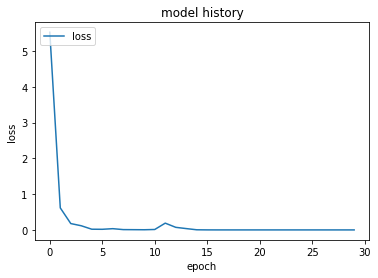

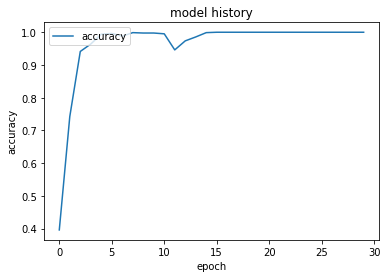

1.0
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 3s 4ms/step - loss: 5.5275 - accuracy: 0.3477
Epoch 2/30
834/834 [==============================] - 3s 4ms/step - loss: 0.8128 - accuracy: 0.6799
Epoch 3/30
834/834 [==============================] - 3s 4ms/step - loss: 0.4433 - accuracy: 0.8369
Epoch 4/30
834/834 [==============================] - 3s 4ms/step - loss: 0.1949 - accuracy: 0.9269
Epoch 5/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0321 - accuracy: 0.9940
Epoch 6/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 7/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0170 - accuracy: 0.9952
Epoch 8/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0057 - accuracy: 

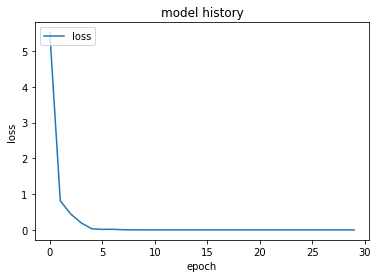

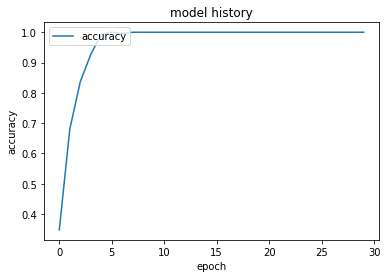

0.9677419066429138
[[11  3  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 3s 4ms/step - loss: 7.8550 - accuracy: 0.3693
Epoch 2/30
834/834 [==============================] - 3s 4ms/step - loss: 0.5850 - accuracy: 0.7734
Epoch 3/30
834/834 [==============================] - 3s 4ms/step - loss: 0.1906 - accuracy: 0.9281
Epoch 4/30
834/834 [==============================] - 3s 4ms/step - loss: 0.1124 - accuracy: 0.9568
Epoch 5/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0866 - accuracy: 0.9736
Epoch 6/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0560 - accuracy: 0.9772
Epoch 7/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0468 - accuracy: 0.9856
Epoch 8/30
834/834 [==============================] - 3s 4ms/step - loss: 0.00

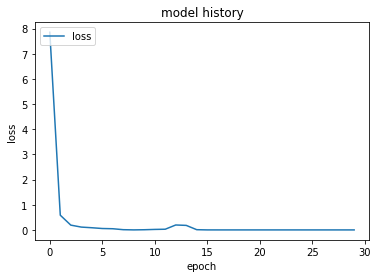

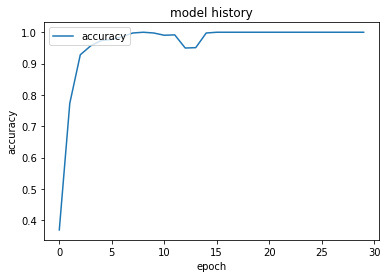

0.9784946441650391
[[14  0  0  0  0  0]
 [ 0 16  0  0  1  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  1 24]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 3s 4ms/step - loss: 7.1377 - accuracy: 0.3633
Epoch 2/30
834/834 [==============================] - 3s 4ms/step - loss: 0.5460 - accuracy: 0.7734
Epoch 3/30
834/834 [==============================] - 3s 4ms/step - loss: 0.2615 - accuracy: 0.8981
Epoch 4/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0701 - accuracy: 0.9772
Epoch 5/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0218 - accuracy: 0.9952
Epoch 6/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0415 - accuracy: 0.9868
Epoch 7/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0276 - accuracy: 0.9892
Epoch 8/30
834/834 [==============================] - 3s 4ms/step - loss: 0.01

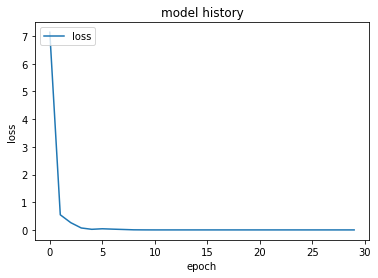

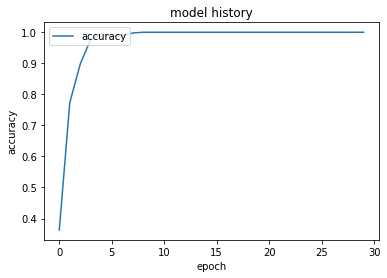

1.0
[[14  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 3s 4ms/step - loss: 7.4389 - accuracy: 0.3549
Epoch 2/30
834/834 [==============================] - 3s 4ms/step - loss: 0.7253 - accuracy: 0.7374
Epoch 3/30
834/834 [==============================] - 3s 4ms/step - loss: 0.2483 - accuracy: 0.9077
Epoch 4/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0996 - accuracy: 0.9664
Epoch 5/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0384 - accuracy: 0.9892
Epoch 6/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0197 - accuracy: 0.9916
Epoch 7/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0368 - accuracy: 0.9868
Epoch 8/30
834/834 [==============================] - 3s 4ms/step - loss: 0.1416 - accuracy: 

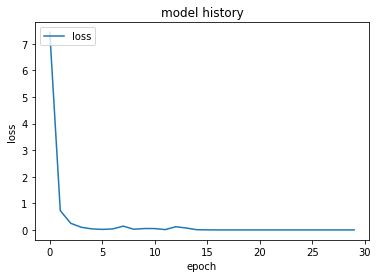

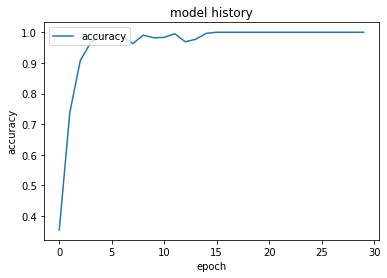

1.0
[[14  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 3s 4ms/step - loss: 7.1680 - accuracy: 0.4065
Epoch 2/30
834/834 [==============================] - 3s 4ms/step - loss: 0.4688 - accuracy: 0.7986
Epoch 3/30
834/834 [==============================] - 3s 4ms/step - loss: 0.1193 - accuracy: 0.9532
Epoch 4/30
834/834 [==============================] - 3s 4ms/step - loss: 0.1063 - accuracy: 0.9580
Epoch 5/30
834/834 [==============================] - 3s 4ms/step - loss: 0.1406 - accuracy: 0.9556
Epoch 6/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0200 - accuracy: 0.9976
Epoch 7/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 8/30
834/834 [==============================] - 3s 4ms/step - loss: 6.1638e-04 - accura

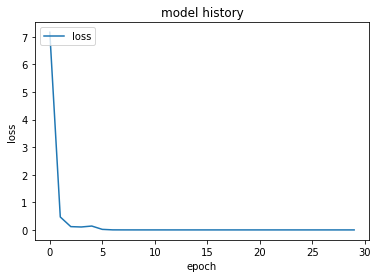

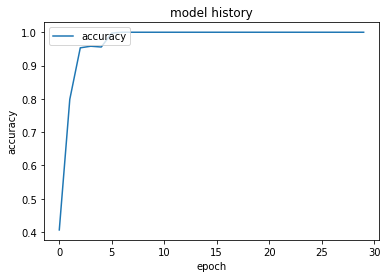

1.0
[[14  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 24]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 3s 4ms/step - loss: 7.0780 - accuracy: 0.2866
Epoch 2/30
834/834 [==============================] - 3s 4ms/step - loss: 0.9171 - accuracy: 0.6451
Epoch 3/30
834/834 [==============================] - 3s 4ms/step - loss: 0.3740 - accuracy: 0.8537
Epoch 4/30
834/834 [==============================] - 3s 4ms/step - loss: 0.1741 - accuracy: 0.9353
Epoch 5/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0634 - accuracy: 0.9796
Epoch 6/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0383 - accuracy: 0.9868
Epoch 7/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0639 - accuracy: 0.9796
Epoch 8/30
834/834 [==============================] - 3s 4ms/step - loss: 0.0153 - accuracy: 

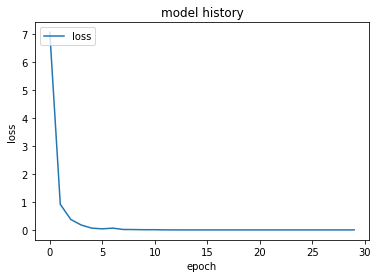

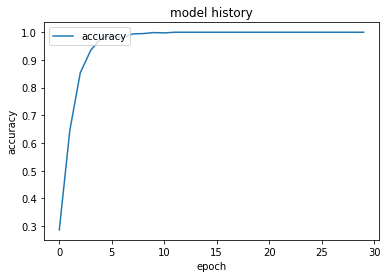

1.0
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/30
835/835 [==============================] - 4s 5ms/step - loss: 6.2361 - accuracy: 0.3329
Epoch 2/30
835/835 [==============================] - 4s 5ms/step - loss: 0.9379 - accuracy: 0.6575
Epoch 3/30
835/835 [==============================] - 4s 5ms/step - loss: 0.3114 - accuracy: 0.8862
Epoch 4/30
835/835 [==============================] - 4s 5ms/step - loss: 0.1291 - accuracy: 0.9617
Epoch 5/30
835/835 [==============================] - 4s 5ms/step - loss: 0.0697 - accuracy: 0.9725
Epoch 6/30
835/835 [==============================] - 4s 5ms/step - loss: 0.0427 - accuracy: 0.9868
Epoch 7/30
835/835 [==============================] - 4s 5ms/step - loss: 0.0233 - accuracy: 0.9916
Epoch 8/30
835/835 [==============================] - 4s 5ms/step - loss: 0.0041 - accuracy: 

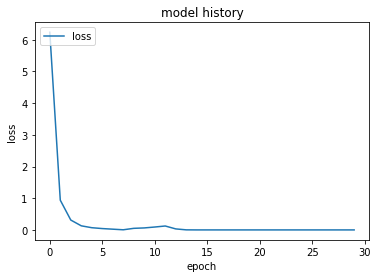

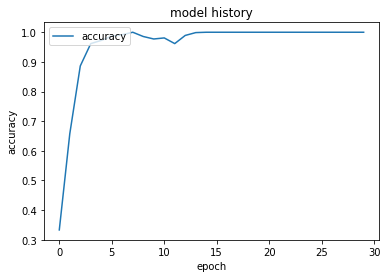

1.0
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/30
360/835 [===========>..................] - ETA: 2s - loss: 13.5404 - accuracy: 0.2333

ResourceExhaustedError: ignored

In [16]:
prediction=[]
confusion_list=[]
num_classes = 6
for train_index, test_index in skf.split(img_x,labels):
    x_train, x_test = img_x[train_index,:,:,:], img_x[test_index,:,:,:]
    y_train, y_test = labels[train_index], labels[test_index]
    y_train =to_categorical(y_train, num_classes)
    y_test =to_categorical(y_test, num_classes)
    X,Y=cnn_model(x_train,x_test,y_test,y_train)
    prediction.append(X)
    confusion_list.append(Y)
    print(X)
    print(Y)
    print("---------------------------------------------------------------------------")

In [17]:
print(prediction)

[1.0, 0.9677419066429138, 0.9784946441650391, 1.0, 1.0, 1.0, 1.0, 1.0]
